<a href="https://colab.research.google.com/github/denisecammarota/qbio2021/blob/main/Chemostat_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chemostat Model

In [ ]:
#@title 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('seaborn')

## Single species Chemostat Model - quick checking

In [ ]:
#@title 
def chemostat_model_single(y,t,b,k,R_0,D,c,m):
  N,R = y
  mu = b*R/(k+R) 
  dNdt = N*(mu-m)
  dRdt = D*(R_0 - R) - c*mu*N
  return dNdt,dRdt
##apparently it works okay like this, let's make some quick trivial checks

In [ ]:
#@title 
def chemostat_equilibrium_single(b,k,R_0,D,c,m):
  R_eq = m*k/(b-m)
  N_eq = (D/(c*m))*(R_0 - R_eq)
  return N_eq,R_eq

### First check: code is working?

If no species, only resource, resource should follow simple exponential equation by itself, decreasing with initial conditions like initial resouce > R_0. In the contrary case, it should increase. If equal, they stay constant.

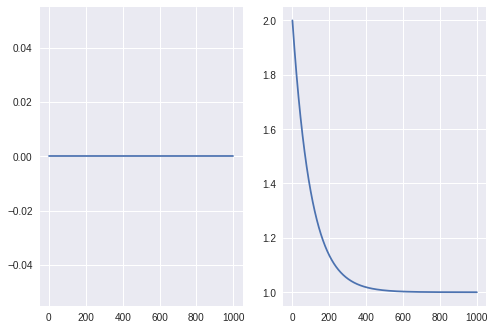

In [ ]:
#@title 
y0 = 0,2
t = np.linspace(0,1000,1000)
b = 0.1
k = 0.1
R_0 = 1
D = 0.01
c = 0.1
m = 0.01
result = odeint(chemostat_model_single, y0, t, args=(b,k,R_0,D,c,m))
N, R = result.T
#N_eq,R_eq = chemostat_equilibrium_single(b,k,R_0,D,c,m)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(t,N)
#ax1.axhline(N_eq,color='r')
ax2.plot(t,R)
#ax2.axhline(R_eq,color='r')
plt.show()

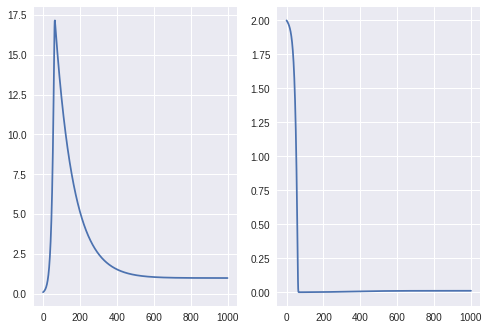

In [ ]:
#@title 
y0 = 0.1,2
t = np.linspace(0,1000,1000)
b = 0.1
k = 0.1
R_0 = 1
D = 0.001
c = 0.1
m = 0.01
result = odeint(chemostat_model_single, y0, t, args=(b,k,R_0,D,c,m))
N, R = result.T
N_eq,R_eq = chemostat_equilibrium_single(b,k,R_0,D,c,m)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(t,N)
#ax1.axhline(N_eq,color='r')
ax2.plot(t,R)
#ax2.axhline(R_eq,color='r')
plt.show()

### Second check: are the equilibrium predicted correct?

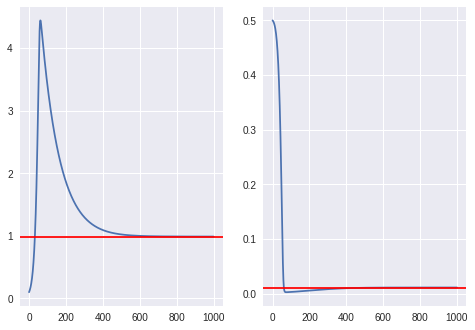

In [ ]:
#@title 
y0 = 0.1,0.5
t = np.linspace(0,1000,1000)
b = 0.1
k = 0.1
R_0 = 1
D = 0.001
c = 0.1
m = 0.01
result = odeint(chemostat_model_single, y0, t, args=(b,k,R_0,D,c,m))
N, R = result.T
N_eq,R_eq = chemostat_equilibrium_single(b,k,R_0,D,c,m)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(t,N)
ax1.axhline(N_eq,color='r')
ax2.plot(t,R)
ax2.axhline(R_eq,color='r')
plt.show()

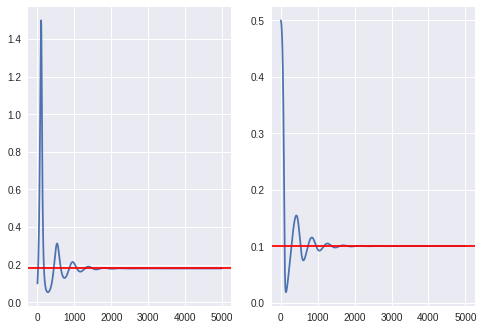

In [ ]:
#@title 
y0 = 0.1,0.5
t = np.linspace(0,5000,5000)
b = 0.1
k = 0.1
R_0 = 1
D = 0.001
c = 0.1
m = 0.05
result = odeint(chemostat_model_single, y0, t, args=(b,k,R_0,D,c,m))
N, R = result.T
N_eq,R_eq = chemostat_equilibrium_single(b,k,R_0,D,c,m)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(t,N)
ax1.axhline(N_eq,color='r')
ax2.plot(t,R)
ax2.axhline(R_eq,color='r')
plt.show()

## Two species Chemostat Model - quick checking

In [ ]:
#@title 
def chemostat_model_double(y,t,b_1,b_2,b_3,k_1,k_2,k_3,R_0,D,c_1,c_2,c_3,m_1,m_2,m_3):
  N_1,N_2,N_3,R = y
  mu_1 = b_1*R/(k_1+R)
  mu_2 = b_2*R/(k_2+R) 
  mu_3 = b_3*R/(k_3+R) 
  dN_1dt = N_1*(mu_1-m_1)
  dN_2dt = N_2*(mu_2-m_2)
  dN_3dt = N_3*(mu_3-m_3)
  dRdt = D*(R_0 - R) - c_1*mu_1*N_1 - c_2*mu_2*N_2 - c_3*mu_3*N_3
  return dN_1dt,dN_2dt,dN_3dt,dRdt
##apparently it works okay like this, let's make some quick trivial checks

In [ ]:
#@title 
def chemostat_equilibrium_double(b_1,b_2,k_1,k_2,R_0,D,c_1,c_2,m_1,m_2):
  R_eq1 = m_1*k_1/(b_1-m_1)
  R_eq2 = m_2*k_2/(b_2-m_2)
  N_1_eq = (D/(c_1*m_1))*(R_0 - R_eq1)
  N_2_eq = (D/(c_2*m_2))*(R_0 - R_eq2)
  return N_1_eq,N_2_eq,R_eq1,R_eq2

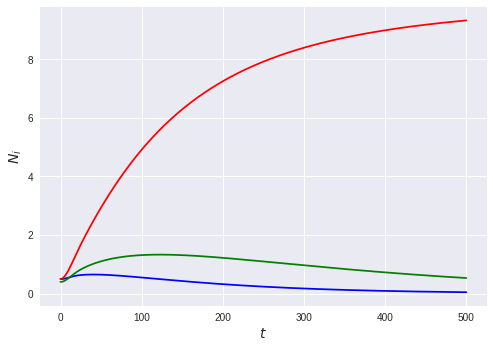

In [ ]:
#@title 
y0 = 0.5,0.4,0.5,0.
t = np.linspace(0,500,500)
b_1 = 0.1
b_2 = 0.2
b_3 = 0.3
k_1 = 0.1
k_2 = 0.1
k_3 = 0.1
R_0 = 1
D = 0.01
c_1 = 0.1
c_2 = 0.1
c_3 = 0.1
m_1 = 0.01
m_2 = 0.01
m_3 = 0.01
result = odeint(chemostat_model_double, y0, t, args=(b_1,b_2,b_3,k_1,k_2,k_3,R_0,D,c_1,c_2,c_3,m_1,m_2,m_3))
N_1,N_2,N_3, R = result.T
#N_1_eq,N_2_eq,R_eq1,R_eq2 = chemostat_equilibrium_double(b_1,b_2,b_3,k_1,k_2,k_3,R_0,D,c_1,c_2,c_3,m_1,m_2,m_3)
#fig, (ax1,ax2,ax3) = plt.subplots(1,3)
#ax1.plot(t,N_1)
#ax1.axhline(N_1_eq,color='r')
#ax1.axhline(0,color='r')
#ax2.plot(t,N_2)
#ax2.axhline(0,color='r')
#ax2.axhline(N_2_eq,color='r')
#ax3.plot(t,R)
#ax3.axhline(R_eq1,color='r')
#ax3.axhline(R_eq2,color='r')
plt.plot(t,N_1,color='blue')
plt.plot(t,N_2,color='green')
plt.plot(t,N_3,color='red')
plt.xlabel(r'$t$',fontsize=14)
plt.ylabel(r'$N_i$',fontsize=14)
plt.show()

In [ ]:
import os
from moviepy.editor import ImageSequenceClip
from moviepy.video.io.bindings import mplfig_to_npimage


def gif(filename, array, fps=30, scale=1.0, mpl=False):
    """Creates a gif given a stack of images using moviepy
    Notes
    -----
    works with current Github version of moviepy (not the pip version)
    https://github.com/Zulko/moviepy/commit/d4c9c37bc88261d8ed8b5d9b7c317d13b2cdf62e
    Usage
    -----
    >>> X = randn(100, 64, 64)
    >>> gif('test.gif', X)
    Parameters
    ----------
    filename : string
        The filename of the gif to write to
    array : array_like
        A numpy array that contains a sequence of images
    fps : int
        frames per second (default: 10)
    scale : float
        how much to rescale each image by (default: 1.0)
    """

    # ensure that the file has the .gif extension
    fname, _ = os.path.splitext(filename)
    filename = fname + '.gif'

    # transform mpl figures into images
    if mpl is True:
      array = np.array([mplfig_to_npimage(fig) for fig in array])

    # copy into the color dimension if the images are black and white
    if array.ndim == 3:
        array = array[..., np.newaxis] * np.ones(3)

    # make the moviepy clip
    clip = ImageSequenceClip(list(array), fps=fps).resize(scale)
    clip.write_gif(filename, fps=fps)
    return clip


[MoviePy] Building file gLV_evolution.gif with imageio


100%|██████████| 496/496 [00:12<00:00, 38.74it/s]


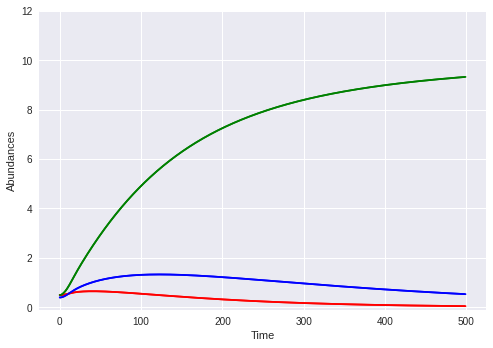

In [ ]:
# matplot subplot
fig, ax = plt.subplots()

# method to get frames
def make_frame(idx):
    
    # clear
    ax.clear()
    
    # plotting line
    ax.plot(t[:idx], N_1[:idx],color='red')
    ax.plot(t[:idx], N_2[:idx],color='blue')
    ax.plot(t[:idx], N_3[:idx],color='green')
    if idx >= 1:
      ax.plot(t[:idx-1], N_1[:idx-1],color='red')
      ax.plot(t[:idx-1], N_2[:idx-1],color='blue')
      ax.plot(t[:idx-1], N_3[:idx-1],color='green')
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Abundances")
    ax.set_ylim(-0.1,12.)
    
    # returning mumpy image
    return mplfig_to_npimage(fig)


gif("gLV_evolution.gif", np.array([make_frame(x) for x in range(4,len(t))]))

In [ ]:
#@title 
y0 = 0.1,0.1,0.5
t = np.linspace(0,1000,1000)
b_1 = 0.2
b_2 = 0.1
k_1 = 0.1
k_2 = 0.1
R_0 = 1
D = 0.01
c_1 = 0.2
c_2 = 0.1
m_1 = 0.05
m_2 = 0.01
result = odeint(chemostat_model_double, y0, t, args=(b_1,b_2,k_1,k_2,R_0,D,c_1,c_2,m_1,m_2))
N_1,N_2, R = result.T
N_1_eq,N_2_eq,R_eq1,R_eq2 = chemostat_equilibrium_double(b_1,b_2,k_1,k_2,R_0,D,c_1,c_2,m_1,m_2)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(t,N_1)
ax1.axhline(N_1_eq,color='r')
ax1.axhline(0,color='r')
ax2.plot(t,N_2)
ax2.axhline(0,color='r')
ax2.axhline(N_2_eq,color='r')
ax3.plot(t,R)
ax3.axhline(R_eq1,color='r')
ax3.axhline(R_eq2,color='r')
plt.show()

TypeError: ignored

## Two species, two resources